In [1]:
from sparse_cnn_tensorflow.sparse_cnn import sparse_conv_2d
from sparse_cnn_tensorflow.sparse_data_value import SparseDataValue
from sparse_cnn_tensorflow.sparse_data_tensor import SparseDataTensor
import numpy as np
import tensorflow as tf
from PIL import Image
import PIL

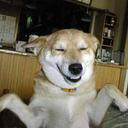

In [18]:
dog_bg = Image.open("dog_with_bg.jpg")
dog_no_bg = Image.open("dog_without_bg.jpg")
dog_bg

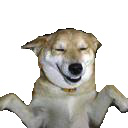

In [19]:
dog_no_bg

#### Create an image by averaging over output channels to disply the result of each convolutional layer
This doesn't do much more than show progressiely blurry dogs, but it's a good check.
Visualising the filters won't be informative becaue we're using random values.

In [20]:
def visualise_output(dense):
    nc = dense.shape[2]
    nc1 = nc // 3
    nc2 = nc // 3
    nc3 = nc - nc1 - nc2
    a = np.empty((dense.shape[0], dense.shape[1], 3))
    a[:, :, 0] = np.mean(dense[:, :, 0:nc1], axis=2)
    a[:, :, 1] = np.mean(dense[:, :, nc1:nc1+nc2], axis=2)
    a[:, :, 2] = np.mean(dense[:, :, nc2:nc], axis=2)
    max_val = np.max(dense)
    a = a * (255 / max_val)
    return Image.fromarray(a.astype(np.uint8))

In [21]:
dog_bg_value = SparseDataValue(np.asarray(dog_bg).astype(np.float32))
dog_bg_tensor = SparseDataTensor(dog_bg_value.H, dog_bg_value.M, dog_bg_value.dense_shape, dog_bg_value.ground_state)

In [24]:
dog_no_bg_value = SparseDataValue(np.asarray(dog_no_bg).astype(np.float32))
dog_no_bg_tensor = SparseDataTensor(
    dog_no_bg_value.H, dog_no_bg_value.M, dog_no_bg_value.dense_shape, dog_no_bg_value.ground_state)

In [26]:
np.random.seed(1)

f1 = 3
n_in_1 = 3
n_out_1 = 8

f2 = 4
n_out_2 = 16


W1 = tf.constant(np.random.rand(f1*f1*n_in_1, n_out_1), dtype=tf.float32)
b1 = tf.constant(np.random.rand(n_out_1), dtype=tf.float32)
s_conv_1 = sparse_conv_2d(dog_no_bg_tensor, W1, f1, n_out_1, b1)
s_A1 = s_conv_1.apply_relu()

W2 = tf.constant(np.random.rand(f2*f2*n_out_1, n_out_2), dtype=tf.float32)
b2 = tf.constant(np.random.rand(n_out_2), dtype=tf.float32)
s_conv_2 = sparse_conv_2d(s_A1, W2, f2, n_out_2, b2)
s_A2 = s_conv_2.apply_relu()


In [27]:
with tf.Session() as sess:
    output = s_A2.to_value(sess)
output

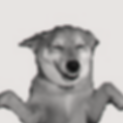

In [28]:
visualise_output(output.to_dense())